In [21]:
from polymorph_app import sdf
from polymorph_num.expr import Expr, as_expr
from polymorph_num.vec import Vec2
from polymorph_num.optimizer import _eval

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from functools import partial


## Checking how the winding number works with a line segment

In [22]:
@partial(jax.jit, static_argnums=(0, 1, 2))
def compute_winding(shape, bounds, n):
    x = jnp.linspace(bounds[0], bounds[1], n)
    X, Y = jnp.meshgrid(x, x)

    sdf = shape.winding_number(as_vec2((as_expr((X.ravel())), as_expr((Y.ravel())))))

    return X, Y, _eval(sdf, [], [], {}).reshape(n, n)

def render_winding(shape, bounds=(-3, 3), n=500):
    X, Y, values = compute_winding(shape, bounds, n)
    plt.imshow(values, origin="lower", cmap="coolwarm", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])


In [23]:
 s = sdf.LineSegment(
                as_vec2((0, 0)),
                as_vec2((1, 0)),
        )

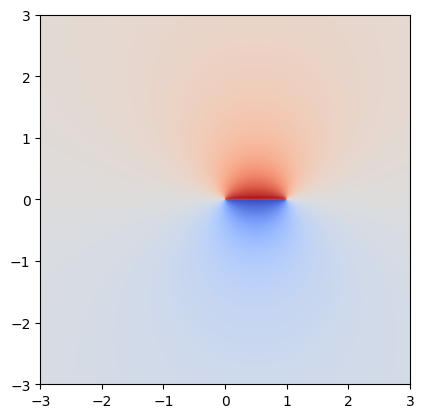

In [24]:
render_winding(s)

## Checking the polygon implementatiopn

In [12]:
@partial(jax.jit, static_argnums=(0, 1, 2))
def compute_distance(shape, bounds, n):
    x = jnp.linspace(bounds[0], bounds[1], n)
    X, Y = jnp.meshgrid(x, x)

    sdf = shape.distance(as_expr((X.ravel())), as_expr((Y.ravel())))

    return X, Y, _eval(sdf, [], [], {}).reshape(n, n)

def render_distance(shape, bounds=(-3, 3), n=500):
    X, Y, values = compute_distance(shape, bounds, n)
    
    fig1, ax2 = plt.subplots(layout='constrained')

    levels = jnp.linspace(-5, 5, 41)

    ax2.axis('equal')
    ax2.contourf(X, Y, values, levels=levels, cmap="PRGn", origin="lower", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])
    ax2.contour(X, Y, values, levels=levels, colors="k", origin="lower", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])

def render_shape(shape, bounds=(-3, 3), n=500):
    X, Y, values = compute_distance(shape, bounds, n)
    plt.imshow(values > 0, origin="lower", cmap="grey", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])

In [3]:
def as_vec2(p):
    return Vec2(*p)
def polygon(points):
    if len(points) < 3:
        return sdf.Circle(as_expr(0.0))
    segments = [
        sdf.LineSegment(
                as_vec2(points[i]),
                as_vec2(points[(i + 1) % len(points)]),
        )
        for i in range(len(points))
    ]
    return sdf.ClosedPath(tuple(segments))


In [15]:
p = polygon([(0, 0),  (0.5, 1), (1, 0), ])
p2 = polygon([(0.1, 0.1),  (-0.3, 0.2), (-1, -1), (0.2, -1)])


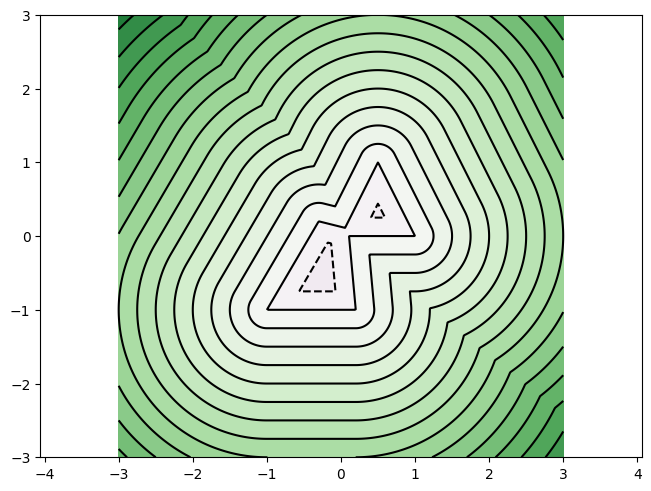

In [20]:
render_distance(sdf.Union(p2, p))

With this method, we have a clean way to handle self intersections

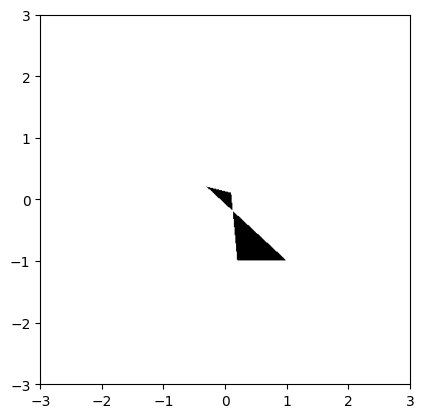

In [31]:
render_shape(polygon([(0.1, 0.1),  (-0.3, 0.2), (1, -1), (0.2, -1)]))